In [1]:
# Sales Analysis: The Role of Price, Discount, and Marketing Spend

# 🧾 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 📂 2. Load Dataset
df = pd.read_csv("Ecommerce_Sales_Prediction_Dataset.csv")
df.head()

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,01-01-2023,Sports,932.80,35.82,Occasional,6780.38,32
1,02-01-2023,Toys,569.48,3.60,Premium,6807.56,16
2,03-01-2023,Home Decor,699.68,3.56,Premium,3793.91,27
3,04-01-2023,Toys,923.27,0.61,Premium,9422.75,29
4,05-01-2023,Toys,710.17,47.83,Premium,1756.83,17


In [2]:
# 🔍 3. Explore Dataset
print(df.info())
print(df.isnull().sum())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1000 non-null   object 
 1   Product_Category  1000 non-null   object 
 2   Price             1000 non-null   float64
 3   Discount          1000 non-null   float64
 4   Customer_Segment  1000 non-null   object 
 5   Marketing_Spend   1000 non-null   float64
 6   Units_Sold        1000 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB
None
Date                0
Product_Category    0
Price               0
Discount            0
Customer_Segment    0
Marketing_Spend     0
Units_Sold          0
dtype: int64


,Price,Discount,Marketing_Spend,Units_Sold
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,505.241920,24.919750,4912.830240,29.631000
std,289.791248,14.439951,2840.602656,7.267989
min,14.590000,0.010000,100.300000,5.000000
25%,243.342500,12.995000,2413.020000,24.000000
50%,509.310000,24.965000,4837.245000,30.000000
75%,747.592500,37.562500,7319.675000,34.000000
max,999.420000,49.920000,9995.620000,57.000000


In [3]:
# 🛠️ 4. Preprocessing
# Create the 'Sales' column
df['Sales'] = df['Price'] * df['Units_Sold'] * (1 - df['Discount']/100)

# Convert 'Date' to datetime format with the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

df.head()
df.describe()

,Date,Price,Discount,Marketing_Spend,Units_Sold,Sales
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2024-05-14 12:00:00,505.241920,24.919750,4912.830240,29.631000,11238.293574
min,2023-01-01 00:00:00,14.590000,0.010000,100.300000,5.000000,178.384008
25%,2023-09-07 18:00:00,243.342500,12.995000,2413.020000,24.000000,4832.722792
50%,2024-05-14 12:00:00,509.310000,24.965000,4837.245000,30.000000,10240.313768
75%,2025-01-19 06:00:00,747.592500,37.562500,7319.675000,34.000000,16478.674280
max,2025-09-26 00:00:00,999.420000,49.920000,9995.620000,57.000000,40515.576192
std,NaN,289.791248,14.439951,2840.602656,7.267989,7596.532355


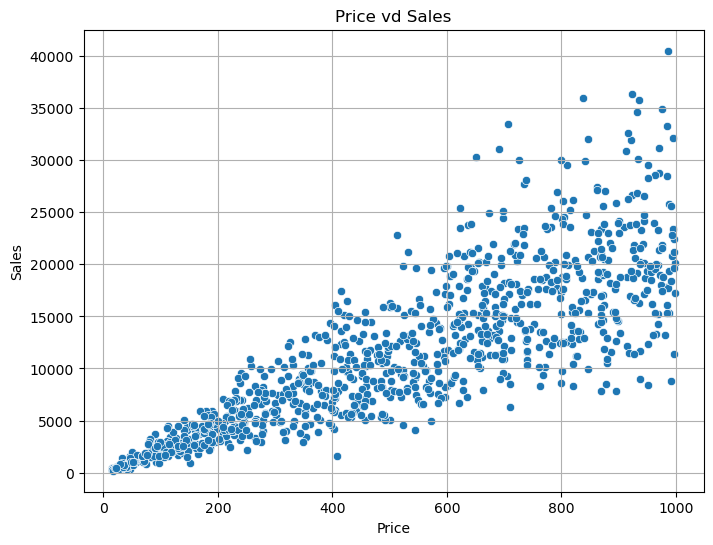

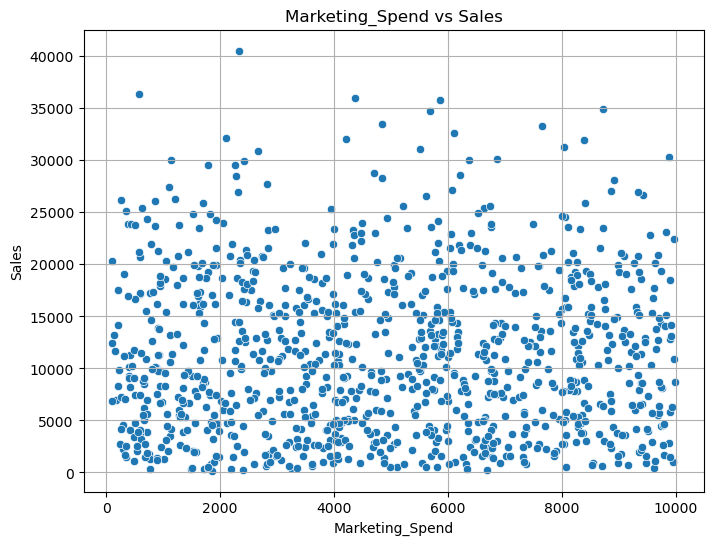

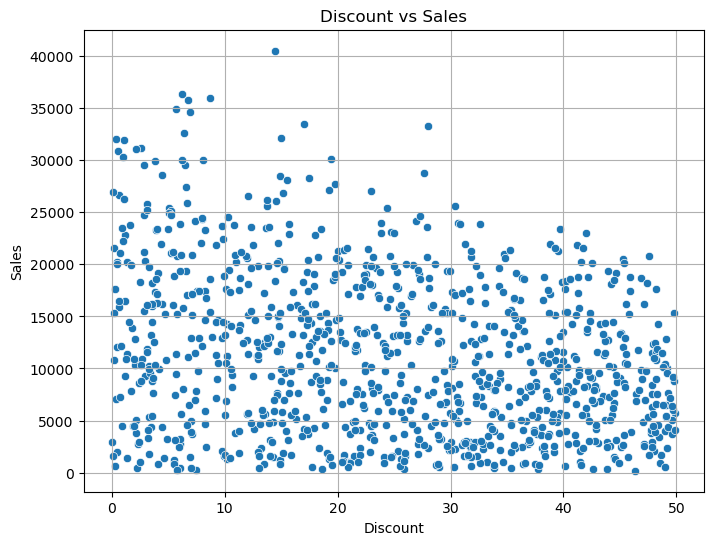

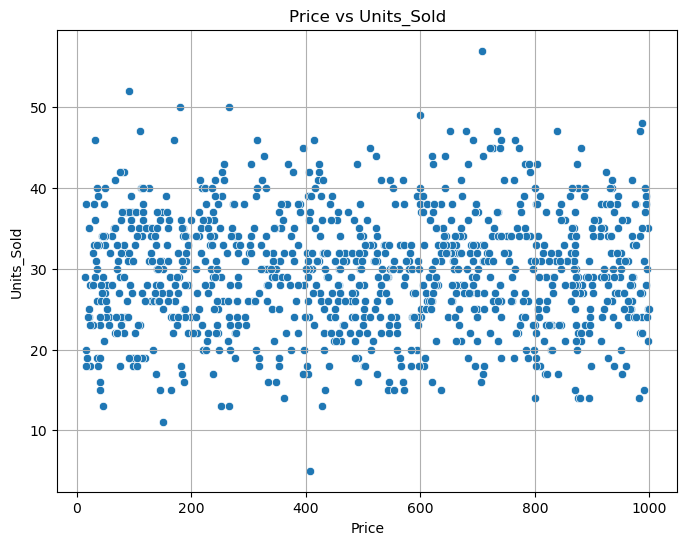

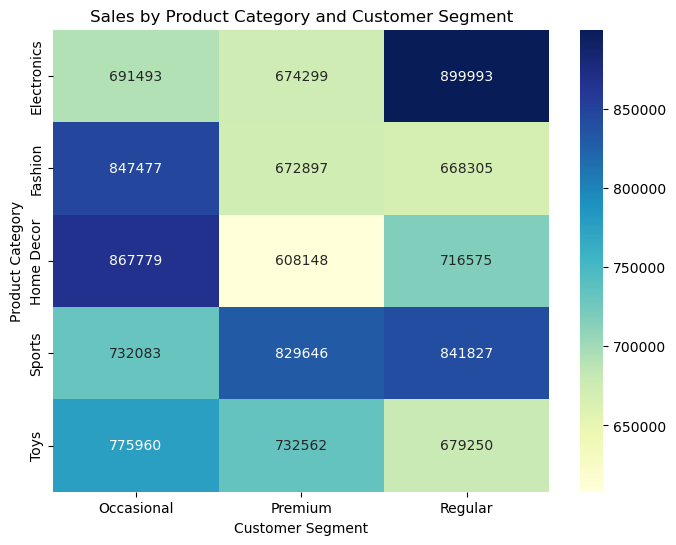

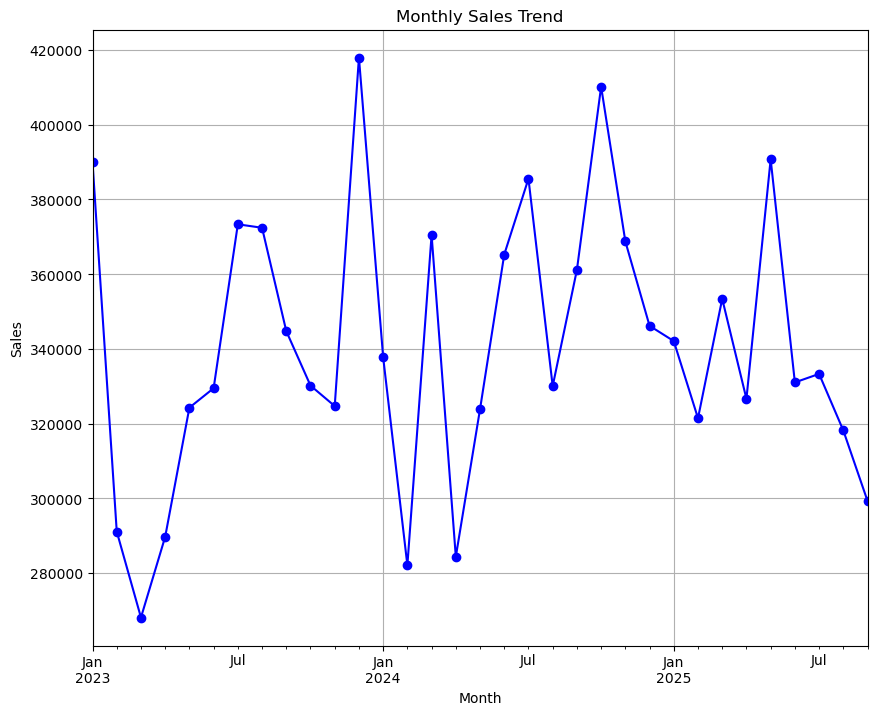

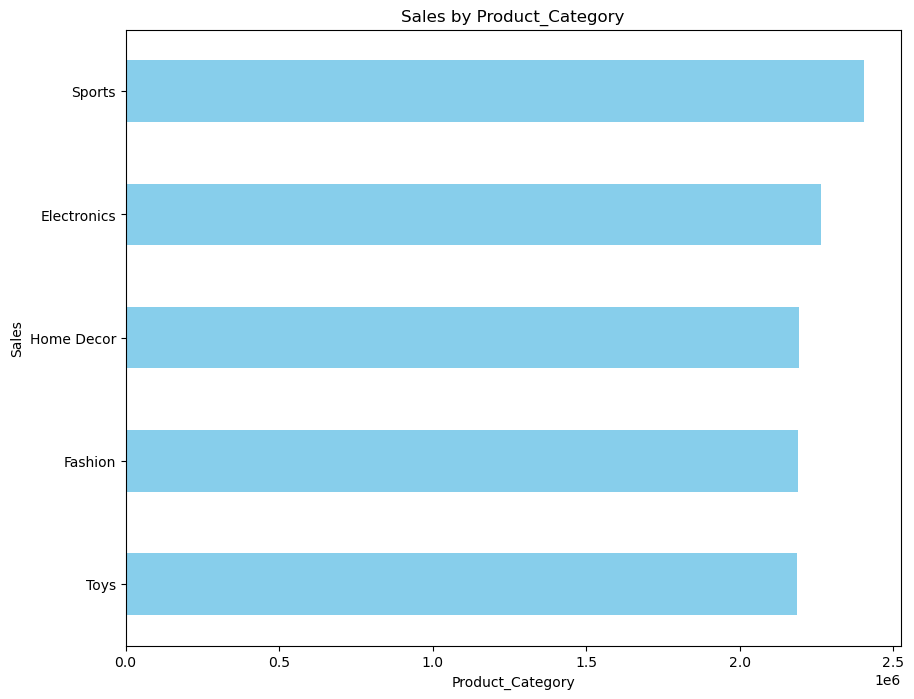

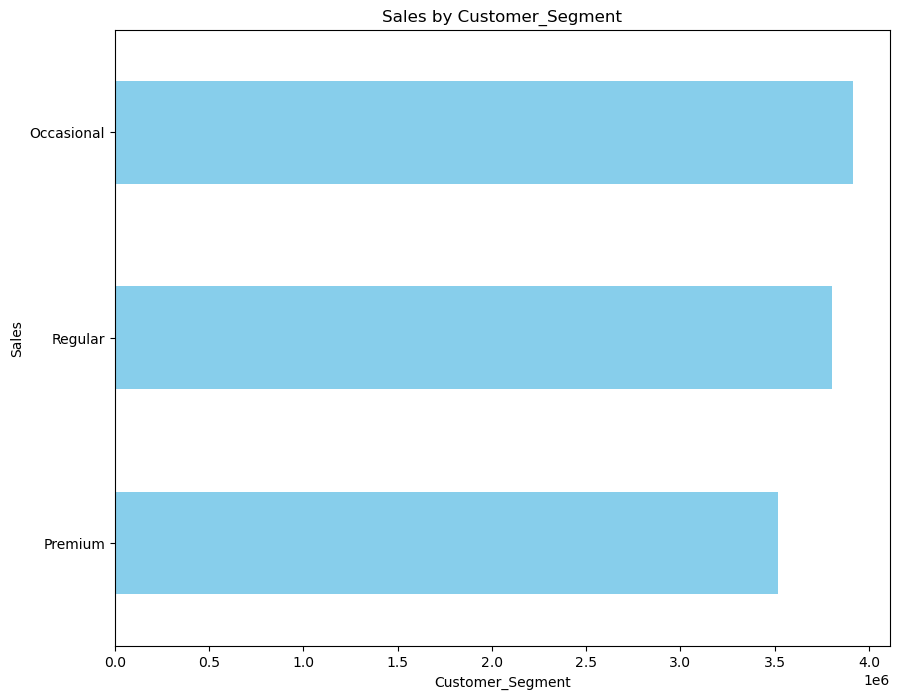

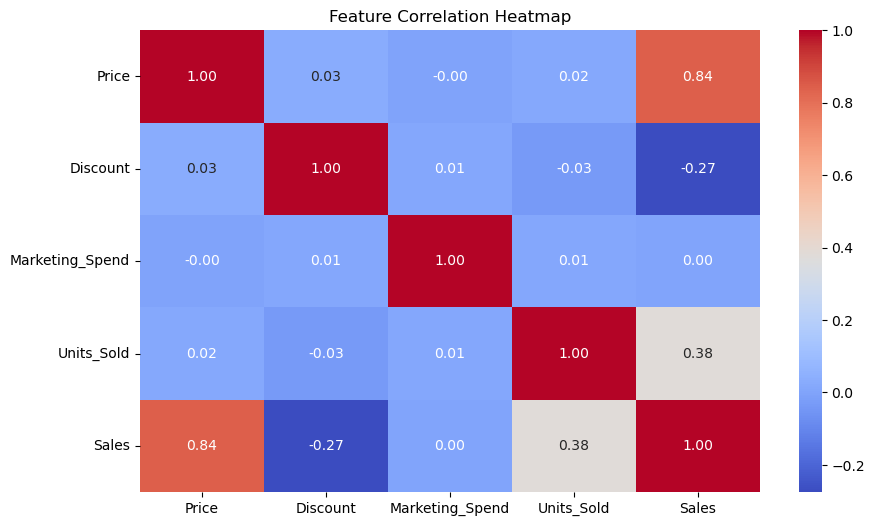

In [4]:
# 📊 5. EDA (Exploratory Data Analysis)

# Scatter plot of Price vs Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Price', y='Sales')

plt.title('Price vd Sales')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.grid(True)

# Scatter plot of Marketing_Spend vs Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Marketing_Spend', y='Sales')

plt.title('Marketing_Spend vs Sales')
plt.xlabel('Marketing_Spend')
plt.ylabel('Sales')
plt.grid(True)

# Scatter plot of Discount vs Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Discount', y='Sales')

plt.title('Discount vs Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.grid(True)

# Scatter plot of Price vs Units_Sold
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Price', y='Units_Sold')

plt.title('Price vs Units_Sold')
plt.xlabel('Price')
plt.ylabel('Units_Sold')
plt.grid(True)

# Create a pivot table of Sales by Product Category and Customer Segment
pivot_table = df.pivot_table(
    index='Product_Category',
    columns='Customer_Segment',
    values='Sales',
    aggfunc='sum'
)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")

plt.title('Sales by Product Category and Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Product Category')

# Aggregate sales by month
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()

# Line chart
plt.figure(figsize=(10, 8))
monthly_sales.plot(kind='line', marker='o', color='b')

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)

# Bar chart
category_sales=df.groupby('Product_Category')['Sales'].sum()

plt.figure(figsize=(10, 8))
category_sales.sort_values().plot(kind='barh', color='skyblue')

plt.title('Sales by Product_Category')
plt.xlabel('Product_Category')
plt.ylabel('Sales')

# Bar chart
Customer_Segment_sales=df.groupby('Customer_Segment')['Sales'].sum()

plt.figure(figsize=(10, 8))
Customer_Segment_sales.sort_values().plot(kind='barh', color='skyblue')

plt.title('Sales by Customer_Segment')
plt.xlabel('Customer_Segment')
plt.ylabel('Sales')

# Heatmap of correlations
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")

plt.show()

In [5]:
# Convert the 'Date' column to datetime format and extract the month
df['Month'] = pd.to_datetime(df['Date']).dt.month

# Perform one-hot encoding on categorical features
df = pd.get_dummies(df, columns=['Product_Category', 'Customer_Segment'], drop_first=True)

In [6]:
# 🤖 6. Model Training - Linear Regression

# Define features and target
X = df[[
    'Price', 'Discount', 'Units_Sold', 'Marketing_Spend', 'Month',
    'Product_Category_Sports', 'Product_Category_Toys', 'Product_Category_Home Decor', 'Product_Category_Fashion',
    'Customer_Segment_Premium', 'Customer_Segment_Regular'
]]
y = df["Sales"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")

Linear Regression - MSE: 4879077.19, R²: 0.92


In [7]:
# 🌲 7. Model Training - Random Forest

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}")

Random Forest - MSE: 1471828.65, R²: 0.98


## 🔍 Key Insights from the Data

- **Price Sensitivity**: There is a clear negative correlation between price and sales — lower prices tend to drive higher sales volumes.
- **Top-Performing Category**: The *Sports* category significantly outperformed Electronics and Others in total revenue.
- **Customer Segment Impact**: The *Occasional* customer segment generated the highest sales, suggesting that even infrequent buyers can be highly valuable.
- **Seasonality**: Sales peaked in **December 2023**, likely due to holiday demand, while **March 2023** recorded the lowest sales, indicating seasonal dips.